# Sigma module

Computes an amplitude of density fluctuation smoothed on a mass scale $M \, [h^{-1}\mathrm{M_\odot}]$,
$$
  \sigma_0^2(M) = \frac{1}{2\pi^2} \int_0^\infty W^2(k; M) P(k) dk.
$$
Amplitude (redshift) of $\sigma_0$ is that of the power spectrum (usually at $z=0$).

s = **Sigma**(*PowerSpectrum*)

1000 pairs of (*M*, 1/*sigma*) are computed in a mass range ($10^{10}$, $10^{16}$), and values in between are computed by spline interpolation.

Operation | Result
------------ | -------------
s(M)         | $\sigma_0(M)$
s.inv(sigma) | inverse function $\sigma^{-1}(\sigma) = M$
len(s)       | length of the (*M*, *sigma*) data computed for interpolation
s[i]         | *i*th pair of (*M*, *sigma*) data
s.M          | array of *M* data
s.sinv       | array of 1/*sigma*
s.M_range    | range of *M* available for interpolation
s.sigma0_range| range of *sigma* available for interpolation

## Examples

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mockgallib as mock

mock.cosmology_set(0.31) # set omega_m
ps = mock.PowerSpectrum('../data/planck1_matterpower.dat')

sigma = mock.Sigma(ps)

sigma

M Sigma
 7.943e+09  3.839e+00
 8.059e+09  3.834e+00
 8.176e+09  3.828e+00
 8.294e+09  3.822e+00
 8.415e+09  3.817e+00
......
 1.445e+16  2.390e-01

In [8]:
print(len(sigma))
print("M range: %.2e %.2e" % sigma.M_range)
print("sigma range: %.4f %.4f" % sigma.sigma0_range)


1001
M range: 1.00e+10 1.00e+16
sigma range: 3.7490 0.2708


Sigma module computes $\sigma$ in the range `sigma.M_range` for `len(sigma) = 1001` points with logarithmic spacing.

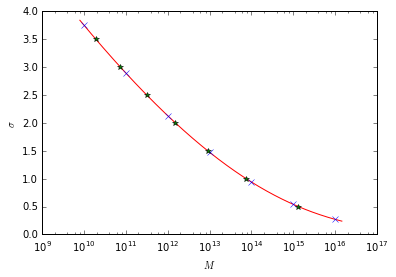

In [17]:
M = sigma.M               # array of M
s = 1.0/sigma.sinv        # array of sigma(M)

plt.xscale('log')
plt.xlabel('$M$')
plt.ylabel('$\\sigma$')

plt.plot(M, s, 'r-')

# s.sigma0(M) computes sigma0 for M in M_range using spline interpolation
M = np.power(10.0, np.arange(10.0, 17.0, 1.0))
s = [sigma(mm) for mm in M]
plt.plot(M, s, 'x')

# s.mass(sigma0) computes the inverse function in sigma_range using spline interpolation
s = np.arange(0.5, 4.0, 0.5)
M = [sigma.inv(ss) for ss in s]
plt.plot(M, s, '*');


In [1]:
%%html
<style>
table {float:left}
</style>